<a href="https://colab.research.google.com/github/eunhobang/ICT-AI-education/blob/main/8_22_2%EC%9D%BC%EC%B0%A83%EA%B0%95_ANN%EC%8B%A4%EC%8A%B5_rmsprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

코랩
- 도커 지원해준다고 생각하면 됨

In [ ]:
from tensorflow import keras
keras.__version__

'2.8.0'

%whos
- 어떤 모듈이 메모리에 올라왔는지 확인

In [ ]:
%whos

Variable         Type          Data/Info
----------------------------------------
digit            ndarray       784: 784 elems, type `float32`, 3136 bytes
keras            module        <module 'tensorflow.keras<...>i/_v2/keras/__init__.py'>
layers           module        <module 'keras.api._v2.ke<...>eras/layers/__init__.py'>
mnist            module        <module 'keras.api._v2.ke<...>asets/mnist/__init__.py'>
models           module        <module 'keras.api._v2.ke<...>eras/models/__init__.py'>
network          Sequential    <keras.engine.sequential.<...>object at 0x7f37bab83390>
plt              module        <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
test_acc         float         0.9817000031471252
test_images      ndarray       10000x784: 7840000 elems, type `float32`, 31360000 bytes (29.9072265625 Mb)
test_labels      ndarray       10000x10: 100000 elems, type `float32`, 400000 bytes (390.625 kb)
test_loss        float         0.06481682509183884
to_categorical   

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

mnist.npz
- 넘파이 형태 파일


In [ ]:
%whos

Variable         Type          Data/Info
----------------------------------------
digit            ndarray       784: 784 elems, type `float32`, 3136 bytes
keras            module        <module 'tensorflow.keras<...>i/_v2/keras/__init__.py'>
layers           module        <module 'keras.api._v2.ke<...>eras/layers/__init__.py'>
mnist            module        <module 'keras.api._v2.ke<...>asets/mnist/__init__.py'>
models           module        <module 'keras.api._v2.ke<...>eras/models/__init__.py'>
network          Sequential    <keras.engine.sequential.<...>object at 0x7f37bab83390>
plt              module        <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
test_acc         float         0.9817000031471252
test_images      ndarray       10000x28x28: 7840000 elems, type `uint8`, 7840000 bytes (7.476806640625 Mb)
test_labels      ndarray       10000: 10000 elems, type `uint8`, 10000 bytes
test_loss        float         0.06481682509183884
to_categorical   function      <funct

In [ ]:
print(type(train_images))
print(train_images.dtype) # uint8::정수라는 뜻
print(train_images.shape)
print(len(train_images))
print(id(train_images)) # 변수가 담겨 있는 메모리 주소

<class 'numpy.ndarray'>
uint8
(60000, 28, 28)
60000
139877175205296


In [ ]:
print(type(test_images))
print(test_images.dtype)
print(test_images.shape)
print(len(test_images))
print(id(test_images)) 

<class 'numpy.ndarray'>
uint8
(10000, 28, 28)
10000
139877175203088


In [ ]:
print(type(train_labels))
print(train_labels.dtype)
print(train_labels.shape)
print(len(train_labels))
print(id(train_labels)) 

<class 'numpy.ndarray'>
uint8
(60000,)
60000
139877175204816


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
import matplotlib.pyplot as plt

<class 'numpy.ndarray'>


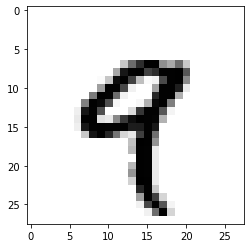

In [ ]:
digit = train_images[4]
print(type(digit))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()



---



---



In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
print(type(train_labels))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
network.fit(train_images, train_labels, epochs=7, batch_size=128)

Epoch 1/7
469/469 [==============================] - 6s 11ms/step - loss: 0.2568 - accuracy: 0.9253
Epoch 2/7
469/469 [==============================] - 5s 12ms/step - loss: 0.1043 - accuracy: 0.9694
Epoch 3/7
469/469 [==============================] - 5s 12ms/step - loss: 0.0685 - accuracy: 0.9788
Epoch 4/7
469/469 [==============================] - 5s 11ms/step - loss: 0.0492 - accuracy: 0.9857
Epoch 5/7
469/469 [==============================] - 6s 12ms/step - loss: 0.0381 - accuracy: 0.9886
Epoch 6/7
469/469 [==============================] - 5s 11ms/step - loss: 0.0294 - accuracy: 0.9914
Epoch 7/7
469/469 [==============================] - 5s 10ms/step - loss: 0.0224 - accuracy: 0.9932


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9808


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.9807999730110168
